## PREDICTION

Given the artists file of the Spotify dataset, the aim is to predict an artist's popularity based on the other features related to them, comparing and choosing the most accurate machine learning model.



### Dataset exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path="/content/drive/MyDrive/Prajaswi_Hunagund_2024UCA1881/Dataset/artists.csv"
df=pd.read_csv(path)
df.head(5)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:
path_tracks="/content/drive/MyDrive/Prajaswi_Hunagund_2024UCA1881/Dataset/tracks.csv"
df_tracks=pd.read_csv(path_tracks)
df_tracks.head(5)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
df_tracks.shape

(586672, 20)

In [ ]:
df_tracks.shape

(586672, 20)

In [ ]:
df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [ ]:
df.isnull().sum()


,0
id,0
followers,11
genres,0
name,3
popularity,0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24425 (\N{CJK UNIFIED IDEOGRAPH-5F69}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31558 (\N{CJK UNIFIED IDEOGRAPH-7B46}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


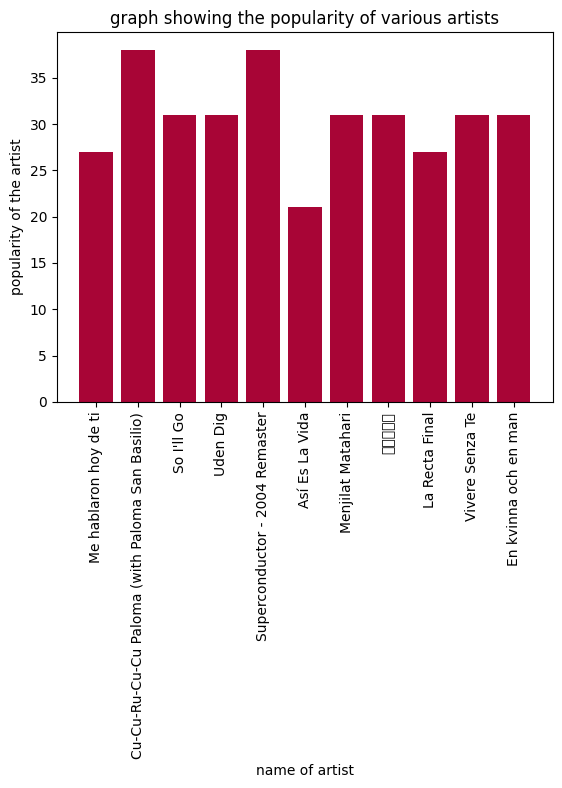

In [ ]:
plt.bar(df_tracks['name'][149600:149611], df_tracks['popularity'][149600:149611], color='#a80536')
plt.xlabel('name of artist')
plt.xticks(rotation=90)
plt.ylabel('popularity of the artist')
plt.title("graph showing the popularity of various artists")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 134 (\x86) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20313 (\N{CJK UNIFIED IDEOGRAPH-4F59}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23159 (\N{CJK UNIFIED IDEOGRAPH-5A77}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


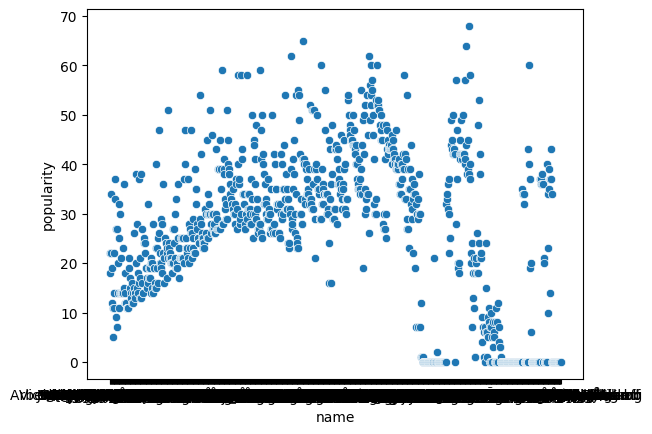

In [ ]:
sns.scatterplot(x='name', y='popularity', data=df[45676:46666])

plt.show()

In [6]:
num_df= df.select_dtypes(include=['number'])
num_df

,followers,popularity
0,0.0,0
1,5.0,0
2,0.0,0
3,0.0,0
4,2.0,0
...,...,...
1162090,4831.0,34
1162091,46.0,2
1162092,257.0,10
1162093,2357.0,15


### Handling missing values

In [ ]:
df.fillna({"name":"Not Known"}, inplace=True)

In [ ]:
df.fillna({"followers":0}, inplace=True)

### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df_tracks)
df_scaled = pd.DataFrame(scaled_data, columns=num_df_tracks.columns)
df_scaled


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-1.174160,-0.815233,-0.214754,0.490096,-0.385182,-1.483654,-0.615393,0.719665,1.924128,0.642528,2.362779,-0.341434,-1.650527,-0.457392,-1.845842
1,-1.500768,-1.042088,-0.214754,0.791115,-1.107625,-1.483654,-2.344110,0.719665,4.736917,0.995129,-0.425120,-0.357710,0.398600,-0.552876,-6.072724
2,-1.500768,-0.382618,-0.214754,-0.780204,-1.449000,-1.199517,-2.156266,0.719665,-0.298309,1.559864,-0.343432,-0.010498,-0.369823,0.401596,2.381040
3,-1.500768,-0.420026,-0.214754,-1.460507,-1.776084,0.505310,-3.488663,0.719665,-0.302756,1.562730,3.014787,-0.596418,-0.602678,1.730782,-1.845842
4,-1.500768,-0.529308,-0.214754,-0.972856,-1.524420,-0.631241,-1.315289,-1.389536,-0.366127,1.545530,0.062013,0.526596,-1.382743,-0.512190,0.267599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,1.220968,0.223004,-0.214754,-0.021636,-0.095410,-1.483654,0.537413,-1.389536,-0.420604,0.960729,-0.425120,-0.809085,-1.324530,0.451253,0.267599
586668,2.418532,-0.606659,-0.214754,1.212541,0.480163,-1.483654,0.979122,0.719665,-0.220485,-0.885409,-0.424007,-0.659350,0.518909,1.062561,0.267599
586669,2.309662,-0.335506,-0.214754,-0.172146,-0.905182,0.505310,-0.514201,-1.389536,-0.356121,1.276063,-0.424558,-0.686476,-1.886099,0.894707,0.267599
586670,1.656446,-0.695890,-0.214754,0.797135,0.289629,1.357723,0.784793,0.719665,-0.391142,-0.699075,-0.425111,0.494045,-0.443560,-0.955375,0.267599


### Normalization

In [8]:
Artists=num_df.columns
for i in Artists:
  min=num_df[i].min()
  max=num_df[i].max()
  num_df[str(i)+'_Normalized']=num_df[i].apply(lambda x: (x-min)/(max-min))
num_df

,followers,popularity,followers_Normalized,popularity_Normalized,followers_Normalized_Normalized,popularity_Normalized_Normalized
0,0.0,0,0.000000e+00,0.00,0.000000e+00,0.00
1,5.0,0,6.337117e-08,0.00,6.337117e-08,0.00
2,0.0,0,0.000000e+00,0.00,0.000000e+00,0.00
3,0.0,0,0.000000e+00,0.00,0.000000e+00,0.00
4,2.0,0,2.534847e-08,0.00,2.534847e-08,0.00
...,...,...,...,...,...,...
1162090,4831.0,34,6.122922e-05,0.34,6.122922e-05,0.34
1162091,46.0,2,5.830147e-07,0.02,5.830147e-07,0.02
1162092,257.0,10,3.257278e-06,0.10,3.257278e-06,0.10
1162093,2357.0,15,2.987317e-05,0.15,2.987317e-05,0.15


### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['name_encoded']=le.fit_transform(df['name'])
df.drop('name',axis=1,inplace=True)
print(df)


                             id  followers            genres  popularity  \
0        0DheY5irMjBUeLybbCUEZ2        0.0                []           0   
1        0DlhY15l3wsrnlfGio2bjU        5.0                []           0   
2        0DmRESX2JknGPQyO15yxg7        0.0                []           0   
3        0DmhnbHjm1qw6NCYPeZNgJ        0.0                []           0   
4        0Dn11fWM7vHQ3rinvWEl4E        2.0                []           0   
...                         ...        ...               ...         ...   
1162090  3cOzi726Iav1toV2LRVEjp     4831.0  ['black comedy']          34   
1162091  6LogY6VMM3jgAE6fPzXeMl       46.0                []           2   
1162092  19boQkDEIay9GaVAWkUhTa      257.0                []          10   
1162093  5nvjpU3Y7L6Hpe54QuvDjy     2357.0  ['black comedy']          15   
1162094  2bP2cNhNBdKXHC6AnqgyVp       40.0    ['new comedy']           8   

         name_encoded  
0               69355  
1             1120866  
2              

In [ ]:
le=LabelEncoder()
df['genre_encoded']=le.fit_transform(df['genres'])
df.drop('genres',axis=1,inplace=True)
print(df)

                             id  followers  popularity  name_encoded  \
0        0DheY5irMjBUeLybbCUEZ2        0.0           0         69355   
1        0DlhY15l3wsrnlfGio2bjU        5.0           0       1120866   
2        0DmRESX2JknGPQyO15yxg7        0.0           0        848393   
3        0DmhnbHjm1qw6NCYPeZNgJ        0.0           0       1020213   
4        0Dn11fWM7vHQ3rinvWEl4E        2.0           0        438294   
...                         ...        ...         ...           ...   
1162090  3cOzi726Iav1toV2LRVEjp     4831.0          34         38459   
1162091  6LogY6VMM3jgAE6fPzXeMl       46.0           2        828751   
1162092  19boQkDEIay9GaVAWkUhTa      257.0          10        119246   
1162093  5nvjpU3Y7L6Hpe54QuvDjy     2357.0          15        270945   
1162094  2bP2cNhNBdKXHC6AnqgyVp       40.0           8        357635   

         genre_encoded  
0                49154  
1                49154  
2                49154  
3                49154  
4         

In [ ]:
le=LabelEncoder()
df['id_encoded']=le.fit_transform(df['id'])
df.drop('id',axis=1,inplace=True)
print(df)

         followers  popularity  name_encoded  genre_encoded  id_encoded
0              0.0           0         69355          49154       63024
1              5.0           0       1120866          49154       63275
2              0.0           0        848393          49154       63320
3              0.0           0       1020213          49154       63339
4              2.0           0        438294          49154       63360
...            ...         ...           ...            ...         ...
1162090     4831.0          34         38459          11428      567495
1162091       46.0           2        828751          49154      957567
1162092      257.0          10        119246          49154      212505
1162093     2357.0          15        270945          11428      879535
1162094       40.0           8        357635          43321      422104

[1162095 rows x 5 columns]


In [ ]:
A=df[['id_encoded','followers','genre_encoded','name_encoded']]
B=df['popularity']
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.2, random_state=42)
print(A_train)
print(A_test)
print(B_train)
print(B_test)

         id_encoded  followers  genre_encoded  name_encoded
132528       253176       41.0          49154        288479
114712        15034        0.0          49154        443754
177648       445655      813.0          23939       1010898
536672       165514      151.0          49154        100081
1050679      545849       34.0          49154        623272
...             ...        ...            ...           ...
110268       379682     2013.0          15316        473124
259178       702219     4491.0          25681        233989
131932       315840       22.0          49154       1049386
671155       831674        8.0          49154       1015201
121958      1068123     1789.0          49154        986363

[929676 rows x 4 columns]
         id_encoded  followers  genre_encoded  name_encoded
992827       778433        9.0          49154        395371
109403       152947     1345.0          48948        768752
346159       349535       70.0          29798        942064
1132416      

## Comparing ML models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor()
}


In [ ]:
results = {}

for model_name, model in models.items():
    model.fit(A_train, B_train)
    B_pred = model.predict(A_test)

    mse = mean_squared_error(B_test, B_pred)
    rmse = mse ** 0.5
    r2 = r2_score(B_test, B_pred)
    mae = mean_absolute_error(B_test, B_pred)

    results[model_name] = {"MSE": mse, "RMSE": rmse, "R²": r2, "MAE": mae}


In [ ]:
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 30)


Linear Regression:
  MSE: 151.0531
  RMSE: 12.2904
  R²: 0.1755
  MAE: 9.0329
------------------------------
Decision Tree:
  MSE: 107.1604
  RMSE: 10.3518
  R²: 0.4151
  MAE: 6.0914
------------------------------
Random Forest:
  MSE: 55.5843
  RMSE: 7.4555
  R²: 0.6966
  MAE: 4.7031
------------------------------
KNN Regressor:
  MSE: 102.5921
  RMSE: 10.1288
  R²: 0.4400
  MAE: 6.9059
------------------------------


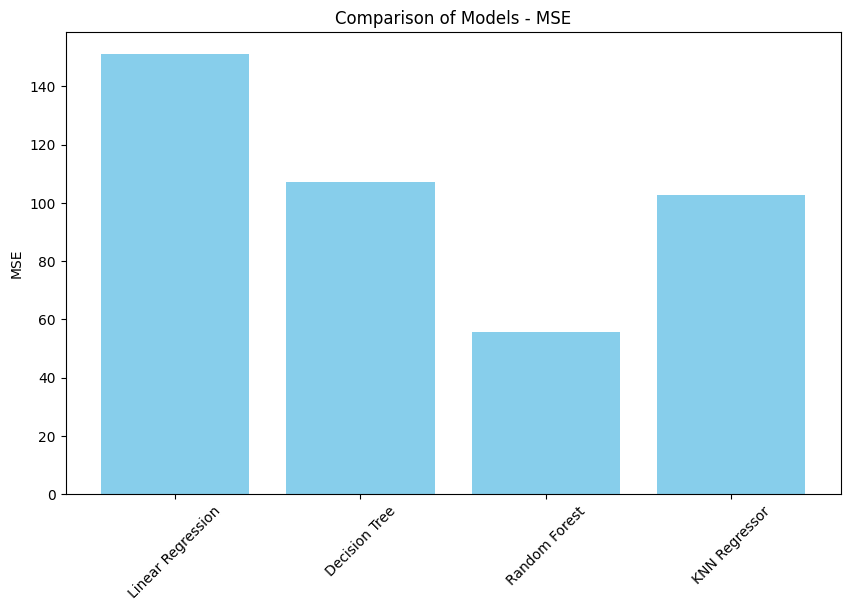

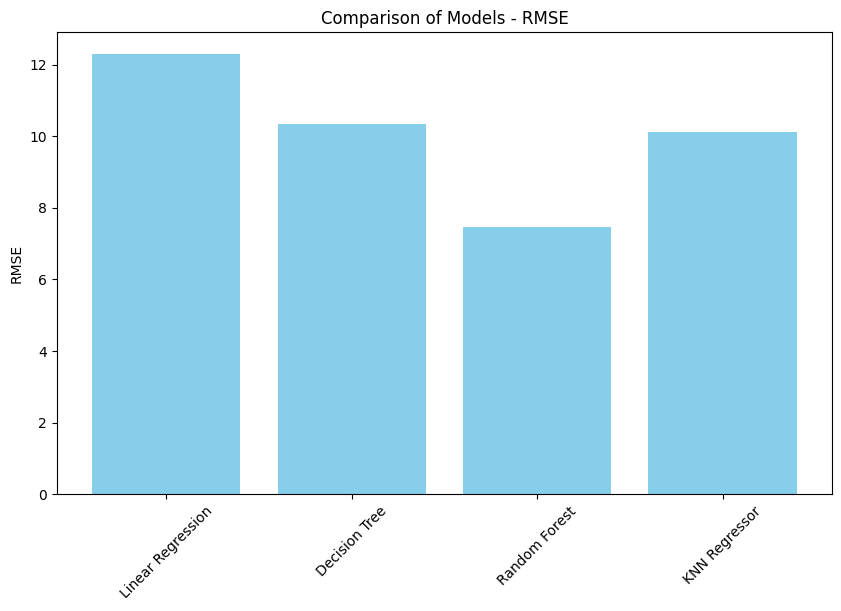

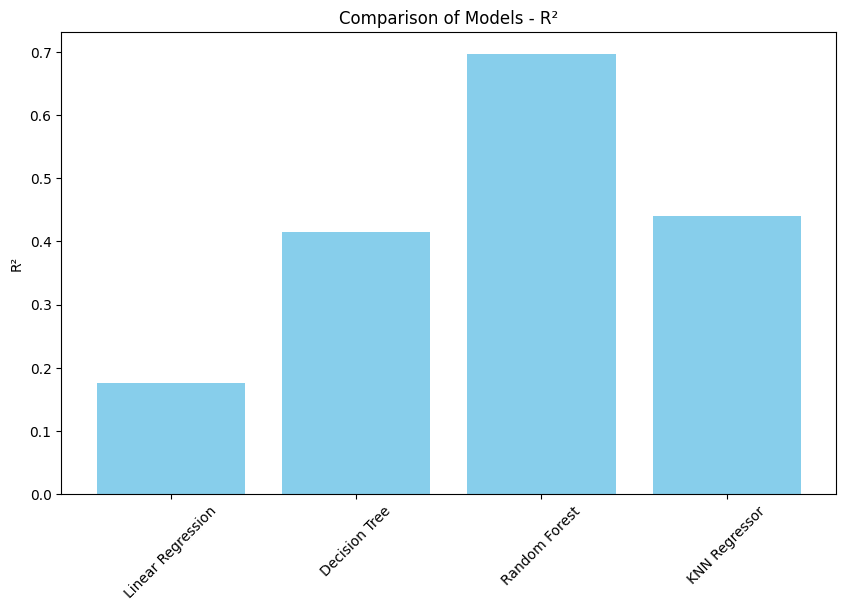

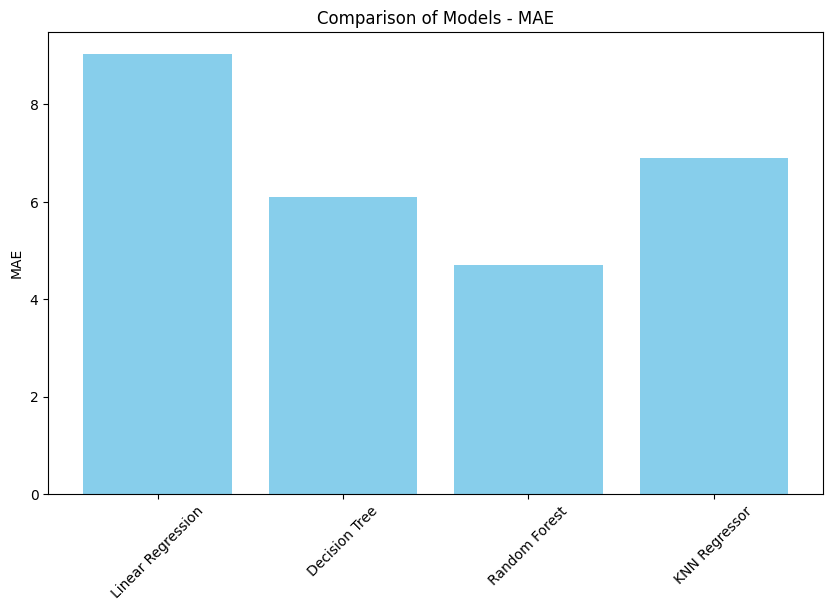

In [ ]:
metrics_to_plot = ['MSE', 'RMSE', 'R²', 'MAE']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    model_names = list(results.keys())
    metric_values = [results[model][metric] for model in model_names]

    plt.bar(model_names, metric_values, color='skyblue')
    plt.title(f'Comparison of Models - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()
